In [62]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import linear_model

import matplotlib.pyplot as plt
import pandas as pd

#Set-Up Data
data = pd.read_csv("cars04.csv")
df = pd.DataFrame(data,columns = data.columns)


##Let's see the variables
data.columns 

Index(['Vehicle Name', 'Hybrid', 'SuggestedRetailPrice', 'DealerCost',
       'EngineSize', 'Cylinders', 'Horsepower', 'CityMPG', 'HighwayMPG',
       'Weight', 'WheelBase', 'Length', 'Width'],
      dtype='object')

In [63]:
##Lets see a glimpse of what our dataset looks like
data.head()

,Vehicle Name,Hybrid,SuggestedRetailPrice,DealerCost,EngineSize,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,WheelBase,Length,Width
0,Chevrolet Aveo 4dr,0,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,0,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,0,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,0,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,0,16385,15357,2.2,4,140,26,37,2617,104,183,69


In [64]:
X, y = pd.DataFrame(data, columns = ["Horsepower","CityMPG","HighwayMPG"]), pd.DataFrame(data, columns = ["SuggestedRetailPrice"])


#Lets  make 70% of the data training data for our model and the other 30% data to test and make predictions on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [65]:
#set the model using the training data
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

#R^2 (Correlation Coefficient)
model.score(X_train,y_train)

0.7480316968904253

In [66]:
#coefficients of predictor values of models
m = lm.coef_
m

array([[ 229.92944447,  497.56629572, -171.49984589]])

In [67]:
#to print of equation
print(' SuggestedRetailPrice = {0} * Horsepower + {1} * CityMPG + {2} * HighwayMPG '.format(m[0,0],m[0,1],m[0,2]))

 SuggestedRetailPrice = 229.9294444676713 * Horsepower + 497.56629571848714 * CityMPG + -171.49984589076666 * HighwayMPG 


In [68]:
predictions = lm.predict(X_test)
predictions = [float(i) for i in predictions]

#Make data frame to compare results
r = pd.DataFrame({"pred" : predictions, "real" : y_test.iloc[:,0]})
r

,pred,real
195,33779.273646,44295
15,9846.045149,11839
156,40694.090222,30835
216,46116.259884,43495
223,32320.545189,45707
...,...,...
230,30982.464879,43175
187,33967.706734,43755
4,16174.736323,16385
26,11421.632803,16999


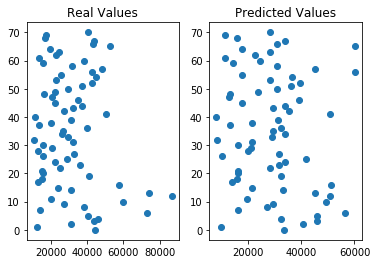

In [69]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(r.real, np.arange(71))
ax1.set_title("Real Values")
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(predictions, np.arange(71))
ax2.set_title("Predicted Values")
plt.show()

In [71]:
#Logistic Regression
lm = linear_model.LogisticRegression()

X, y = pd.DataFrame(data, columns = ["Horsepower","CityMPG","HighwayMPG"]), pd.DataFrame(data, columns = ["Cylinders"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = lm.fit(X_train,y_train)

#R^2
model.score(X_train,y_train)

C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8159509202453987

In [72]:
#Make predictions with training data
predictions = lm.predict(X_test)
predictions = [float(i) for i in predictions]

In [73]:
#Make data frame to compare results

r = pd.DataFrame({"pred" : predictions, "real" : y_test.iloc[:,0]})
r

,pred,real
214,8.0,8
196,6.0,6
207,6.0,8
150,6.0,6
202,8.0,8
...,...,...
122,6.0,6
70,4.0,4
218,6.0,8
3,4.0,4


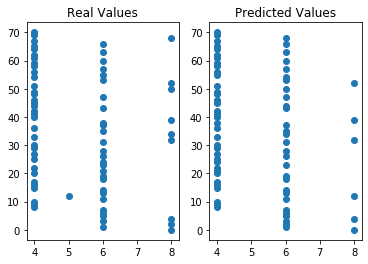

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(r.real, np.arange(71))
ax1.set_title("Real Values")
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(predictions, np.arange(71))
ax2.set_title("Predicted Values")
plt.show()

In [75]:
#Cross validation
#Performance Measure that divides the data into k chunks and test and evaluates them individually 
#Good for making sure you model is sufficient with validating different parts of the data
#Note : Each value represents the classification rate of a different variable
#Ignore the warning in this case
print(cross_val_score(lm, X_test, y_test, cv=10))

[0.88888889 1.         1.         0.875      0.71428571 1.
 0.57142857 0.83333333 0.83333333 1.        ]


C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nate Barrett\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning